Exercise 2 part 1

In [27]:
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

tau = 10**(-10)
x0 = [100, 100] #starting from the initial point
gamma,rho=0.5,0.5
alphas=[1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]


def gradf(x1, x2):
  return -2*x1-98, -2*x2+72 # here we multiply by -1 in the value of gradient of x1,x2 because -gradf(x0[0], x0[1]) give error so we change here

def g(x1, x2):
  return (x1 + 49)**2 + (x2-36)**2

new_alpha=[]

for alpha in alphas:
  pk1, pk2 = gradf(x0[0], x0[1])
  iteration = 0
  xk1= x0[0]
  xk2 = x0[1]

  while g(xk1 + alpha*pk1, xk2+(alpha)*pk2)> g(xk1,xk2) -(gamma)*(alpha)*(np.array([pk1,pk2])@np.array([pk1,pk2])):
    alpha = rho*alpha
    iteration+=1

  new_alpha.append(alpha)

print("The alpha values from backtracking method are",new_alpha)




The alpha values from backtracking method are [0.5, 0.45, 0.375, 0.3, 0.5, 0.4, 0.25, 0.1, 0.01]


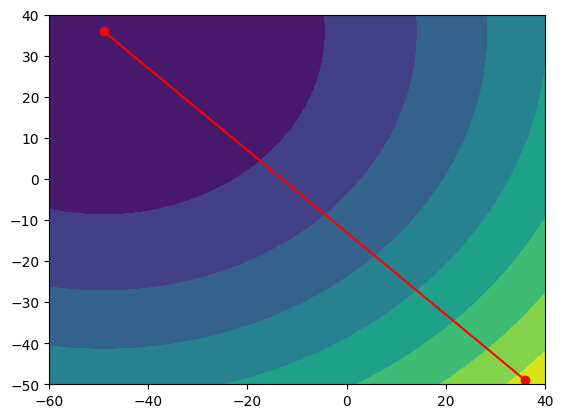

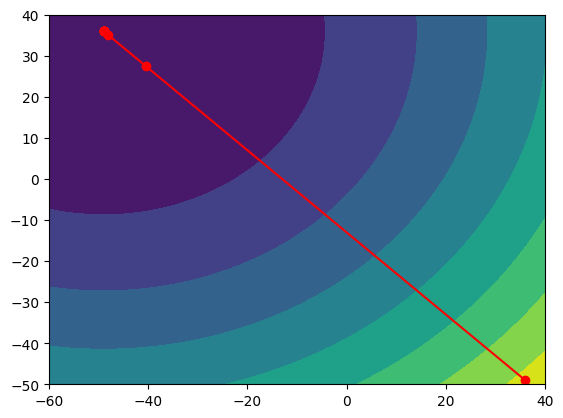

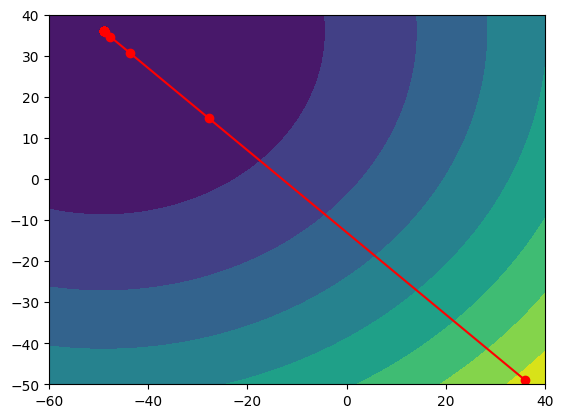

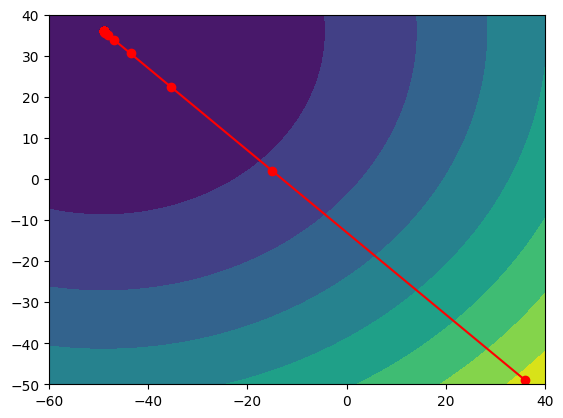

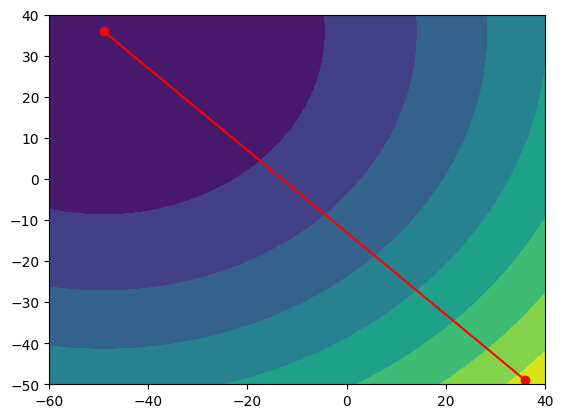

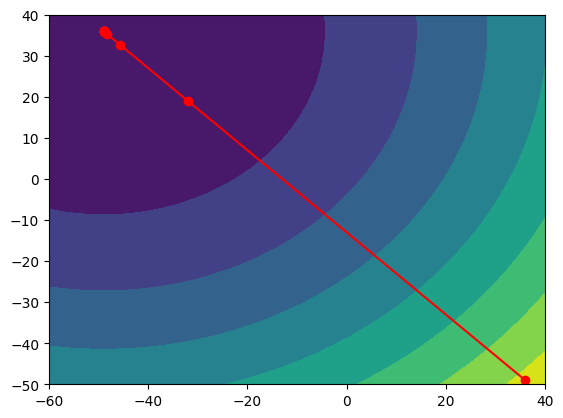

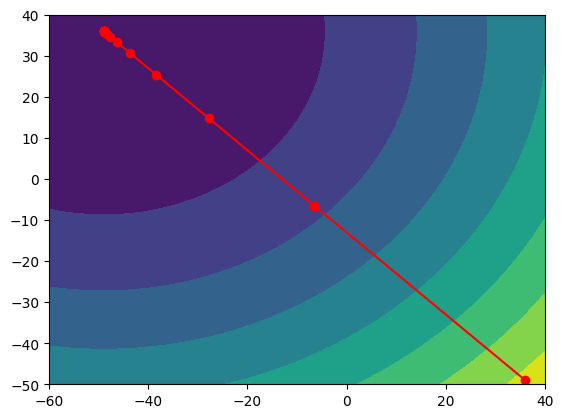

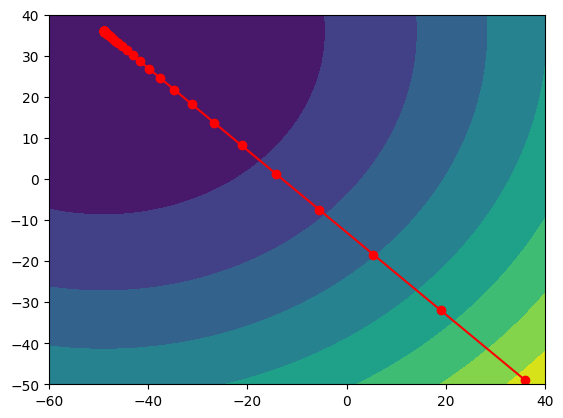

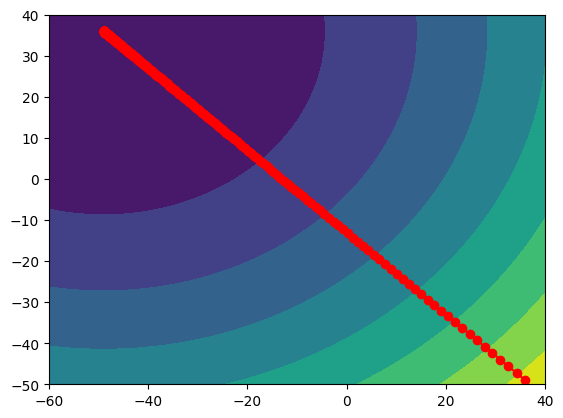

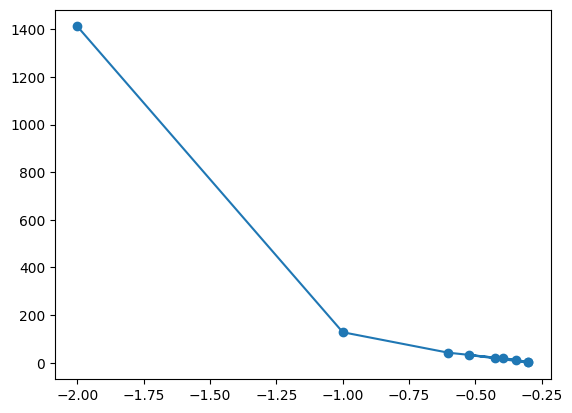

In [28]:
# For new alpha
tau=10**(-10)
x0 = [36, -49] #starting from the initial point



def gradf(x1, x2):
  return -2*x1-98, -2*x2+72 # here we multiply by -1 in the value of gradient of x1,x2 because -gradf(x0[0], x0[1]) give error so we change here
store = []
for step in new_alpha:
  pk1, pk2 = gradf(x0[0], x0[1])
  iteration = 0
  xk1= x0[0]
  xk2 = x0[1]

  # Create a meshgrid for visualization
  x1 = np.linspace(-60, 40, 400)
  x2 = np.linspace(-50, 40, 400)
  X1, X2 = np.meshgrid(x1, x2)
  Z = g(X1, X2)

  # Plot the level sets
  plt.contourf(X1, X2, Z, cmap='viridis')

  xc = []
  yc = []
  xc.append(x0[0])
  yc.append(x0[1])

  while norm(np.array([pk1, pk2])) > tau:
    xk1, xk2 = xk1 + step*pk1, xk2 + step*pk2
    pk1 , pk2 = gradf(xk1, xk2)
    iteration += 1
    xc.append(xk1)
    yc.append(xk2)
  store.append(iteration)


  plt.plot(xc,yc, marker='o', color='red', label='Gradient Descent Trajectory')
  plt.show()
plt.plot(np.log10(new_alpha), store, marker='o')

[36, 35.83, 35.66034, 35.49101932, 35.32203728136, 35.153393206797276, 34.98508642038368, 34.81711624754291, 34.64948201504783, 34.482183051017735, 34.3152186849157, 34.14858824754587, 33.982291071050774, 33.81632648890867, 33.65069383593085, 33.48539244825899, 33.320421663362474, 33.15578082003575, 32.99146925839568, 32.82748631987889, 32.66383134723914, 32.50050368454466, 32.33750267717557, 32.17482767182122, 32.01247801647758, 31.850453060444625, 31.688752154323737, 31.52737465001509, 31.36631990071506, 31.205587260913628, 31.045176086391802, 30.885085734219018, 30.72531556275058, 30.56586493162508, 30.406733201761828, 30.247919735358305, 30.089423895887588, 29.931245048095814, 29.77338255799962, 29.615835792883622, 29.458604121297856, 29.30168691305526, 29.145083539229148, 28.98879337215069, 28.832815785406385, 28.677150153835573, 28.5217958535279, 28.366752261820846, 28.212018757297205, 28.05759471978261, 27.903479530343045, 27.74967257128236, 27.596173226139797, 27.44298087968751

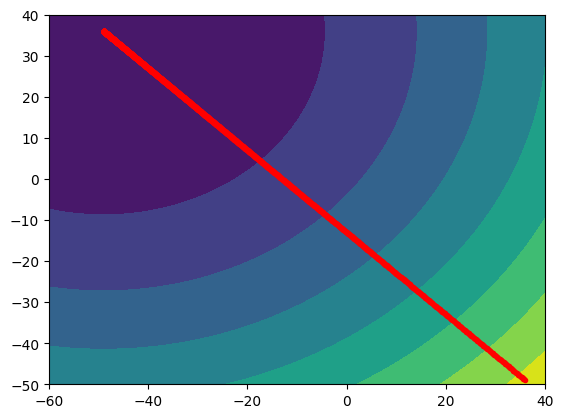

In [29]:
# for fixed alpha
tau=10**(-10)
x0 = [36, -49] #starting from the initial point


def gradf(x1, x2):
  return -2*x1-98, -2*x2+72 # here we multiply by -1 in the value of gradient of x1,x2 because -gradf(x0[0], x0[1]) give error so we change here
store = []

pk1, pk2 = gradf(x0[0], x0[1])
iteration = 0
xk1= x0[0]
xk2 = x0[1]

# Create a meshgrid for visualization
x1 = np.linspace(-60, 40, 400)
x2 = np.linspace(-50, 40, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = g(X1, X2)

# Plot the level sets
plt.contourf(X1, X2, Z, cmap='viridis')

xc = []
yc = []
xc.append(x0[0])
yc.append(x0[1])

while norm(np.array([pk1, pk2])) > tau:
  xk1, xk2 = xk1 + 0.001*pk1, xk2 + 0.001*pk2
  pk1 , pk2 = gradf(xk1, xk2)
  iteration += 1
  xc.append(xk1)
  yc.append(xk2)
store.append(iteration)


plt.plot(xc,yc, marker='.', color='red', label='Gradient Descent Trajectory')



From backtracking method we can find optimal solution in faster way as compare to fixed alpha

Exercise 2 part 2

In [30]:
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

tau = 10**(-10)
x0 = [100, 100] #starting from the initial point
gamma,rho=0.5,0.5
alphas=[1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]


def gradf(x1, x2):
  return -1024*(x2-x1**2)*x1 -2*(2-x1),512*(x2-x1**2) # here we multiply by -1 in the value of gradient of x1,x2 because -gradf(x0[0], x0[1]) give error so we change here

def g(x1, x2):
  return 256*(x2-x1**2)**2 + (2-x1)**2

new_alpha=[]

for alpha in alphas:
  pk1, pk2 = gradf(x0[0], x0[1])
  iteration = 0
  xk1= x0[0]
  xk2 = x0[1]

  while g(xk1 + alpha*pk1, xk2+(alpha)*pk2)> g(xk1,xk2) -(gamma)*(alpha)*(np.array([pk1,pk2])@np.array([pk1,pk2])):
    alpha = rho*alpha
    iteration+=1

  new_alpha.append(alpha)

print("The alpha values from backtracking method are",new_alpha)

The alpha values from backtracking method are [3.308722450212111e-24, 2.9778502051908997e-24, 2.481541837659083e-24, 1.9852334701272663e-24, 3.308722450212111e-24, 2.6469779601696887e-24, 3.308722450212111e-24, 2.6469779601696887e-24, 2.117582368135751e-24]


In [ ]:
# For new alpha
tau=10**(-10)
x0 = [36, -49] #starting from the initial point



def gradf(x1, x2):
  return -2*x1-98, -2*x2+72 # here we multiply by -1 in the value of gradient of x1,x2 because -gradf(x0[0], x0[1]) give error so we change here
store = []
for step in new_alpha:
  pk1, pk2 = gradf(x0[0], x0[1])
  iteration = 0
  xk1= x0[0]
  xk2 = x0[1]

  # Create a meshgrid for visualization
  x1 = np.linspace(-60, 40, 400)
  x2 = np.linspace(-50, 40, 400)
  X1, X2 = np.meshgrid(x1, x2)
  Z = g(X1, X2)

  # Plot the level sets
  plt.contourf(X1, X2, Z, cmap='viridis')

  xc = []
  yc = []
  xc.append(x0[0])
  yc.append(x0[1])

  while norm(np.array([pk1, pk2])) > tau:
    xk1, xk2 = xk1 + step*pk1, xk2 + step*pk2
    pk1 , pk2 = gradf(xk1, xk2)
    iteration += 1
    xc.append(xk1)
    yc.append(xk2)
  store.append(iteration)


  plt.plot(xc,yc, marker='o', color='red', label='Gradient Descent Trajectory')
  plt.show()
plt.plot(np.log10(new_alpha), store, marker='o')

In [ ]:
# for fixed alpha
tau=10**(-10)
x0 = [36, -49] #starting from the initial point


def gradf(x1, x2):
  return -2*x1-98, -2*x2+72 # here we multiply by -1 in the value of gradient of x1,x2 because -gradf(x0[0], x0[1]) give error so we change here
store = []

pk1, pk2 = gradf(x0[0], x0[1])
iteration = 0
xk1= x0[0]
xk2 = x0[1]

# Create a meshgrid for visualization
x1 = np.linspace(-60, 40, 400)
x2 = np.linspace(-50, 40, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = g(X1, X2)

# Plot the level sets
plt.contourf(X1, X2, Z, cmap='viridis')

xc = []
yc = []
xc.append(x0[0])
yc.append(x0[1])

while norm(np.array([pk1, pk2])) > tau:
  xk1, xk2 = xk1 + 0.001*pk1, xk2 + 0.001*pk2
  pk1 , pk2 = gradf(xk1, xk2)
  iteration += 1
  xc.append(xk1)
  yc.append(xk2)
store.append(iteration)


plt.plot(xc,yc, marker='.', color='red', label='Gradient Descent Trajectory')